In [2]:
# Import libraries and dependencies
import pandas as pd
from pathlib import Path
%matplotlib inline
import plotly.express as px

In [3]:
# Use the Pathlib libary to set the path to the CSV
evict_path = Path('../data/cleandata/eviction_data.csv')
flood_100_path = Path('../data/cleandata/flood_100yr_clean.csv')
food_path = Path('../data/cleandata/food_desert.csv')
road_path = Path('../data/cleandata/road_flooding_imelda.csv')
school_path = Path('../data/cleandata/school_ratings_data.csv')
svi_path = Path('../data/cleandata/svi_index.csv')

In [4]:
# Use the Pathlib libary to set the path to the CSV
#index_col='FIPS'
eviction_df = pd.read_csv(evict_path)
flood_df = pd.read_csv(flood_100_path)
food_df = pd.read_csv(food_path)
road_df = pd.read_csv(road_path)
school_df = pd.read_csv(school_path)
svi_df = pd.read_csv(svi_path)

In [5]:
eviction_df.set_index("FIPS", inplace=True) #removing repeating FIPS by combining their data, taking a mean/average
flood_df = flood_df.groupby('FIPS').mean()
food_df = food_df.groupby('FIPS').mean()
road_df.set_index("FIPS", inplace=True)
school_df = school_df.groupby('FIPS').mean()
svi_df = svi_df.groupby('FIPS').mean()

In [7]:
full_dataset = pd.concat([eviction_df, food_df, flood_df, school_df, svi_df], join='outer',axis=1, sort=False)
full_dataset.head()

,year,population,poverty-rate,median-household-income,median-property-value,evictions,eviction-rate,Urban,LATracts_half,LATracts1,LATracts10,LATracts20,Pct_in_100yr,Zip,Rating,Socioeconomic,Housing - Disability,Minority Status - Language,Housing - Transportation,SVI INDEX
FIPS,,,,,,,,,,,,,,,,,,,,
48157670101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77053.0,2.0,NaN,NaN,NaN,NaN,NaN
48157670200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77053.0,5.0,NaN,NaN,NaN,NaN,NaN
48157670700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77053.0,3.0,NaN,NaN,NaN,NaN,NaN
48157672400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77083.0,5.0,NaN,NaN,NaN,NaN,NaN
48157672601,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77083.0,5.0,NaN,NaN,NaN,NaN,NaN


In [203]:
#data frame to csvfile
full_dataset.to_csv(r'../data/cleandata/join_data.csv')

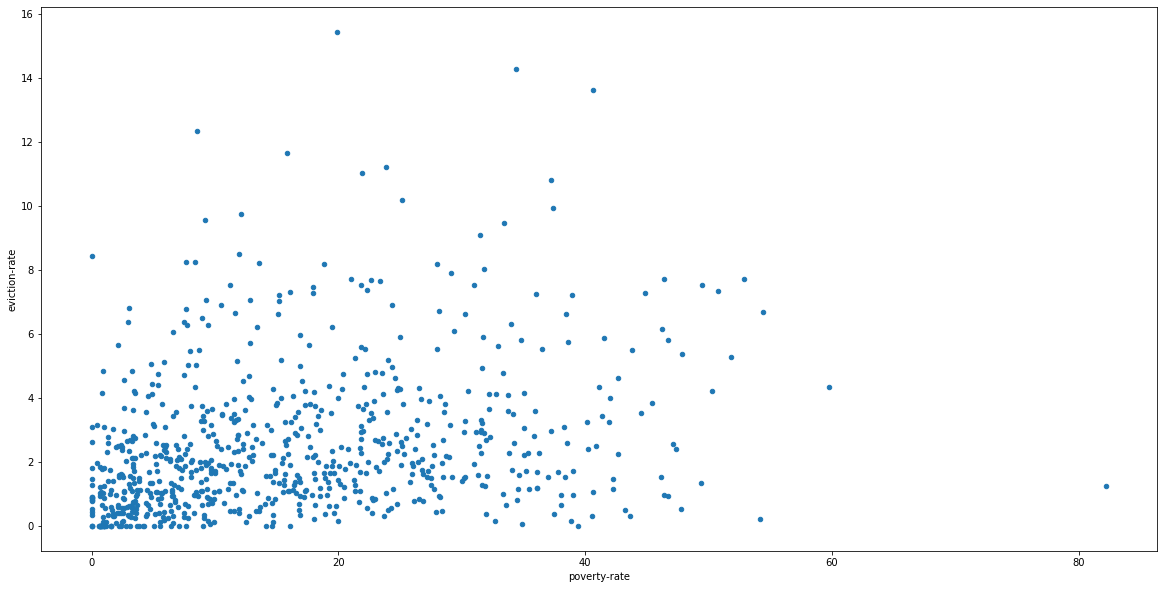

In [158]:
ax1 = eviction_df.plot.scatter(x='poverty-rate',
                                y='eviction-rate',
                                 figsize = (20,10))

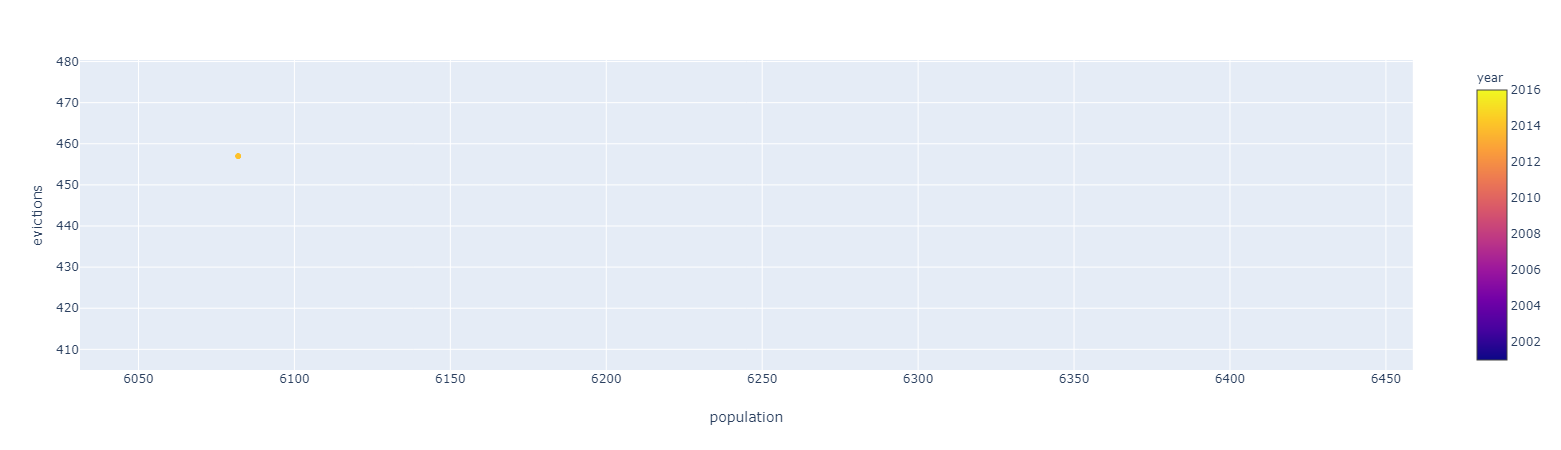

In [71]:
ax2 = px.scatter(eviction_df, x= "population", y = "evictions", color = "year")
ax2.show()

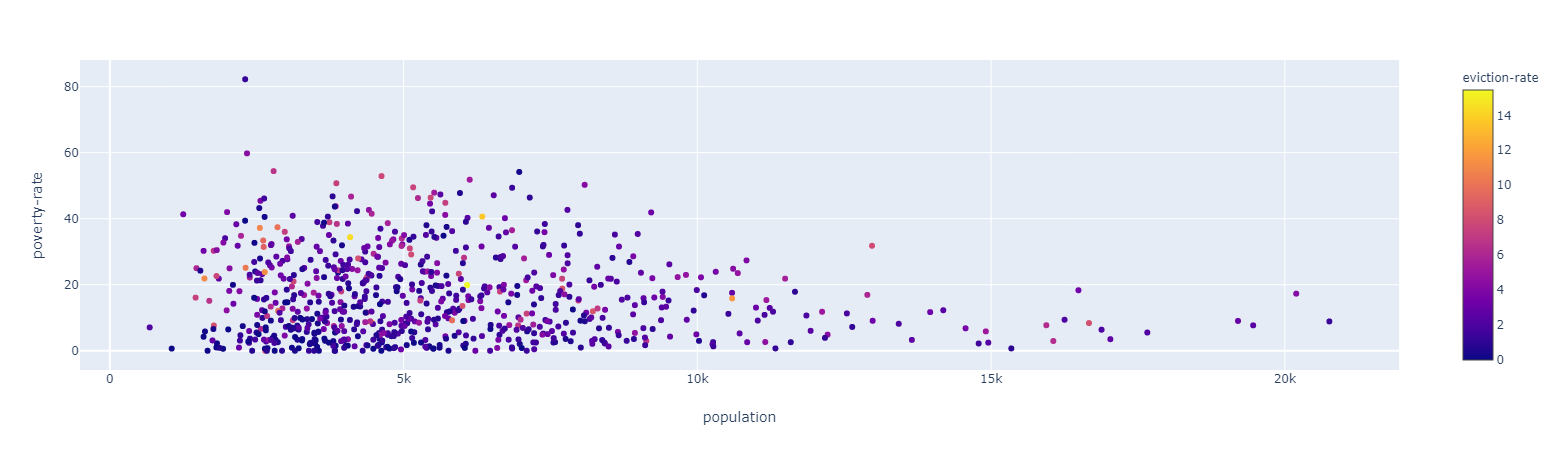

In [72]:
ax3 = px.scatter(eviction2016_df, x= "population", y = "poverty-rate", color = "eviction-rate")
ax3.show()

In [92]:
full_dataset['Rating'].isna().count()

3505

In [93]:
full_dataset.shape

(3505, 41)

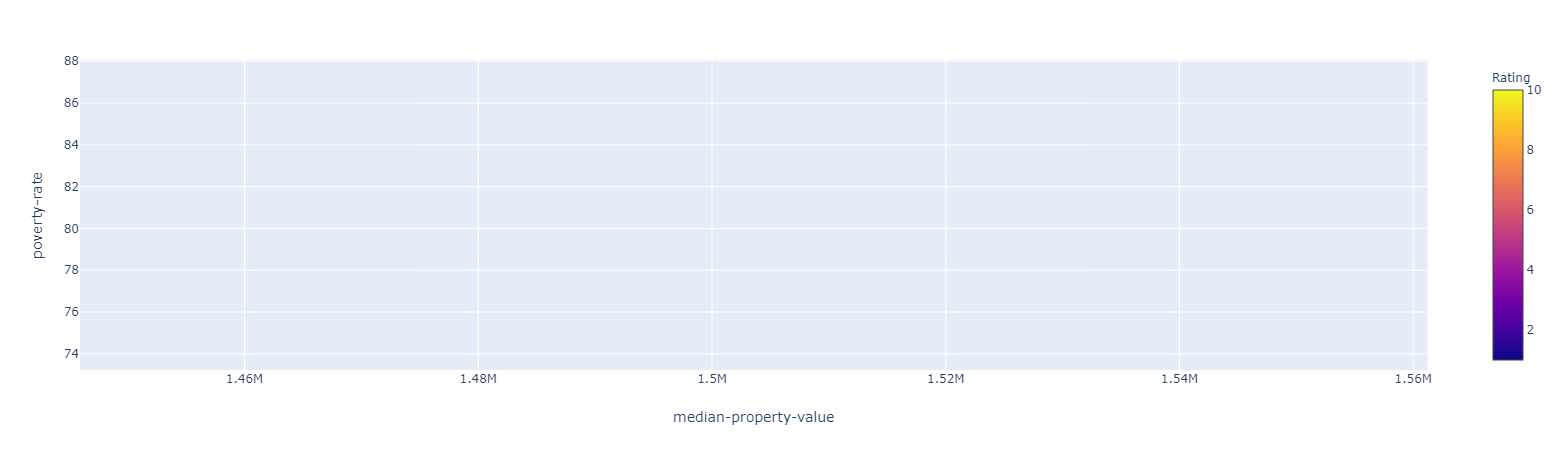

In [78]:
ax4 = px.scatter(full_dataset, x= "median-property-value", y = "poverty-rate", color = "Rating")
ax4.show()